In [1]:
import torch
out=torch.load('train/scop40_pad/raw_output.pt')
names=list(out.keys())

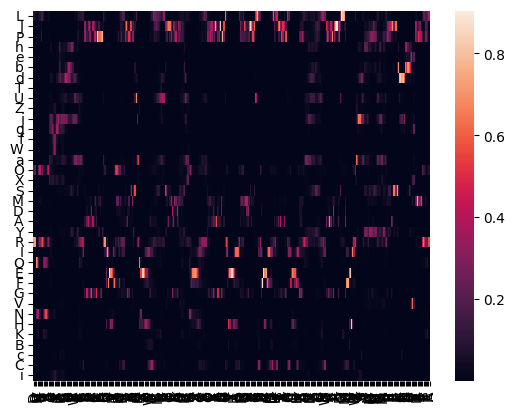

In [11]:
from pred import plot_output
import torch
# o=torch.load('train/debug_pred-2/raw_output.pt')
i=10000
fig,ax=plot_output(out,names[i]) #key for the entry you want to plot
fig.show()

In [1]:
from datasets import Dataset
ds=Dataset.load_from_disk('data/mu-compare')

In [2]:
ds

Dataset({
    features: ['stem', 'seq', 'pLDDT', 'Conf3', 'NENConf3', 'Conf16', 'NENConf16', 'RENDist4', 'RevNbrDist4', 'RENConf16'],
    num_rows: 1000
})

In [8]:
import pandas as pd
_:pd.DataFrame=pd.read_pickle('/home/mutest1/SS4/ss4_sandbox/train/v2-test/deliver-pack/pred-sum.pkl')
# with open('scop40-out-clean-ref.fasta','w') as f:
#     for idx,s in _[_['seq-consistency']].iterrows():
#         f.write(f'>{s['stem']}\n{s['seq-reseek']}\n{s['Mu-gt']}\n')

In [9]:
_.columns

Index(['stem', 'seq-biopython', 'seq-reseek', 'seq-consistency', 'Conf3-gt',
       'Conf3-pred', 'Conf3-conf', 'NENConf3-gt', 'NENConf3-pred',
       'NENConf3-conf', 'RevNbrDist4-gt', 'RevNbrDist4-pred',
       'RevNbrDist4-conf', 'Mu-gt', 'mu-pred', 'mu-conf'],
      dtype='object')

In [10]:
with open('scop40-out-3code.fasta','w') as f:
    for idx,s in _.iterrows():
        f.write('\n'.join([f'>{s['stem']}']+[s[f'{i}-pred'] for i in ['Conf3','NENConf3','RevNbrDist4']])+'\n')
        # f.write(f'>{s['stem']}\n{s['seq-reseek']}\n{s['Mu-gt']}\n')

In [11]:
_.to_csv('sum-pred.csv',index=False)

In [12]:
_.loc[0]

stem                                                          d12asa_
seq-biopython       AYIAKQRQISFVKSHFSRQLEERLGLIEVQAPILSRVGDGTQDNLS...
seq-reseek          AYIAKQRQISFVKSHFSRQLEERLGLIEVQAPILSRVGDGTQDNLS...
seq-consistency                                                  True
Conf3-gt            CCAAAAAAAAAAAAAAAAAAAAACCBBBBBBBCCBBCCCCCCCCCC...
Conf3-pred          CCAAAAAAAAAAAAAAAAAAAAACCBBBBBBBCCBCCACCCCBBCC...
Conf3-conf          [0.9999959468841553, 0.9999929666519165, 0.999...
NENConf3-gt         AAAAACCCCCCCCCCCCBCBBBBBCBBBCCCCBBBBBBBAACCCCC...
NENConf3-pred       CAAACCCCCCCCCCCCCBCBBCCCCBBBCCCCCCBBBBBAACCCCC...
NENConf3-conf       [0.6279453039169312, 0.9333390593528748, 0.999...
RevNbrDist4-gt      BBBBBBBBBBBBBDDDDDDDDDDDDCCBCCCDDDDDDDDDDDDDDD...
RevNbrDist4-pred    BBBBBBBBBBBBBDDDDDDDDDDDDCCBCCCDDDDDDDDDDDDDDD...
RevNbrDist4-conf    [0.9999995231628418, 0.9999995231628418, 0.999...
Mu-gt               LLJJJPPPPPPPPhhhheheeeegjWWNZZZiggffgggddjjjjj...
mu-pred             

-- --

In [1]:
import pandas as pd
pred_sum:pd.DataFrame=pd.read_pickle('train/v2-test/deliver-pack/pred-sum.pkl')
struct_ana:pd.DataFrame=pd.read_pickle('train/v2-test/structurewise-ana.pkl')

In [12]:
struct_ana.sort_values(by='mu_acc',ascending=False).iloc[:500]['stem']



,stem,length,Conf3-correct,Conf3-conf,NENConf3-correct,NENConf3-conf,RevNbrDist4-correct,RevNbrDist4-conf,mu-correct,mu-conf,Conf3_acc,NENConf3_acc,RevNbrDist4_acc,mu_acc
2998,d2clya1,105,105,0.998713,105,0.999400,105,0.999987,105,0.998100,1.000000,1.000000,1.000000,1.000000
2367,d1owfb_,94,94,0.994466,93,0.998043,94,0.998516,93,0.991030,1.000000,0.989362,1.000000,0.989362
821,d2axtz1,62,62,0.981453,61,0.998033,62,0.999990,61,0.979553,1.000000,0.983871,1.000000,0.983871
764,d1l2pa_,61,61,0.999811,60,0.984663,61,0.999998,60,0.984472,1.000000,0.983607,1.000000,0.983607
515,d1ojha_,52,52,0.987452,51,0.907442,52,0.983404,51,0.881068,1.000000,0.980769,1.000000,0.980769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7545,d2gfqa1,274,263,0.967284,254,0.919365,259,0.933182,232,0.829932,0.959854,0.927007,0.945255,0.846715
7273,d3hlxa_,254,241,0.978115,239,0.966561,240,0.970613,215,0.918127,0.948819,0.940945,0.944882,0.846457
7454,d1umza_,267,253,0.966493,250,0.950982,252,0.951297,226,0.876859,0.947566,0.936330,0.943820,0.846442
8051,d1hjua_,332,320,0.978355,304,0.942964,321,0.963051,281,0.887915,0.963855,0.915663,0.966867,0.846386


In [7]:
struct_ana.columns

Index(['stem', 'length', 'Conf3-correct', 'Conf3-conf', 'NENConf3-correct',
       'NENConf3-conf', 'RevNbrDist4-correct', 'RevNbrDist4-conf',
       'mu-correct', 'mu-conf', 'Conf3_acc', 'NENConf3_acc', 'RevNbrDist4_acc',
       'mu_acc'],
      dtype='object')

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colormaps
c=colormaps['GnBu'](0.9)
plt.close()
fig,axes=plt.subplots(1,4,figsize=(32,8))
sns.histplot()
struct_ana.sort_values(by='mu_acc',ascending=False)[['Conf3_acc','NENConf3_acc','RevNbrDist4_acc','mu_acc']].hist(bins=20,ax=axes,color=c)
fig.tight_layout()
fig.set_dpi(800)
fig.savefig('acc-hist.svg')

In [25]:
with open('poor-100.fasta','w') as f:
    for i in pred_sum.set_index('stem').loc[struct_ana.sort_values(by='mu_acc').iloc[:500]['stem'].tolist()]['seq-biopython'].items():
        f.write(f'>{i[0]}\n{i[1]}\n')

In [13]:
with open('good-500.fasta','w') as f:
    for i in pred_sum.set_index('stem').loc[struct_ana.sort_values(by='mu_acc',ascending=False).iloc[:500]['stem'].tolist()]['seq-biopython'].items():
        f.write(f'>{i[0]}\n{i[1]}\n')